## <center>Title: Case Study 3<center>
## <center>Author: Paolo Ferrari<center>
## <center>Date: 2023-05-08<center>
    
---

###  Introduction

Nosocomial infections are infections acquired during hospitalization in a health-care facility. Various types of
bacteria, viruses and fungi can cause nosocomial infections. These can be transmitted through contaminated
equipment, personal contact with other patients or health-care professionals, or even through the air ventilation.
Negative consequences of nosocomial infections are various: increased patient morbidity, increased risk of death,
increased length-of-stay and increased cost of treatment. Thus, it is important to make hospitals and clinics safe of
such infections.

In an effort to identify the impacts of control measures in the rate of nosocomial infections on hospitals in the
US, the Study on the Efficacy of Nosocomial Infection Control (SENIC) Project conducted data analysis of patient stays
across 338 hospitals during the years 1975-1976. One of the specific goals of the SENIC was to identify if the lengthof-stay of patients in hospitals depended on a number of different variables.

### Objective

In this Case Study, we analyze the dependence of the length-of-stay versus 3 factor variables:(i) the geographical
region of the hospital, (ii) a factor representing the age of the patient and (iii) a factor representing the availability
of facilities and services offered by the hospital. The analyzed data is a sample of the original SENIC data containing
113 records.

For the purpose of the analysis, we split this Case Study into three parts. Starting from Part A, each subsequent part adds an extra variable to our analysis as follows:

- In Part A, we look into the **effect of the geographical region of a hospital on its average length-of-stay.**
- In Part B, we investigate the influence of the **geographical region and age of patient on the average length-of-stay**, including if the combination between these two variables has a significant effect.
- In Part C, we investigate the influence of **geographical region, age and availability of services and facilities have on the average length-of-stay**, including their combined action.

To achieve these goals, we fit various ANOVA models of the different factor variables and test the statistical
significance of each. 

Next, we apply diagnostic and remedial measures to check the validity of the ANOVA
assumptions. 

Finally, we report the results of the models encountered for each of the cases A, B and C.

---


In [1]:
# Importing libraries

library(MASS)
library(ggplot2)
library(repr)

Warning message:
"package 'repr' was built under R version 4.2.3"


## Part A 


### A.0) Data transformation and visualization

In this first part, we test whether the length-of-stay depends on the geographical region.

So, first, let's import and transform the data.

In [2]:
data = read.table("senic.txt")

# Transform Region (V9) to a factor variable:
data$V9 = as.factor(data$V9)

head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<dbl>
1,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60
2,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40
3,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20
4,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40
5,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40
6,6,9.76,50.9,5.1,21.9,97.0,150,2,2,147,106,40


The next figure shows a boxplot of these two variables, with the Region variable taking 4 possible values.


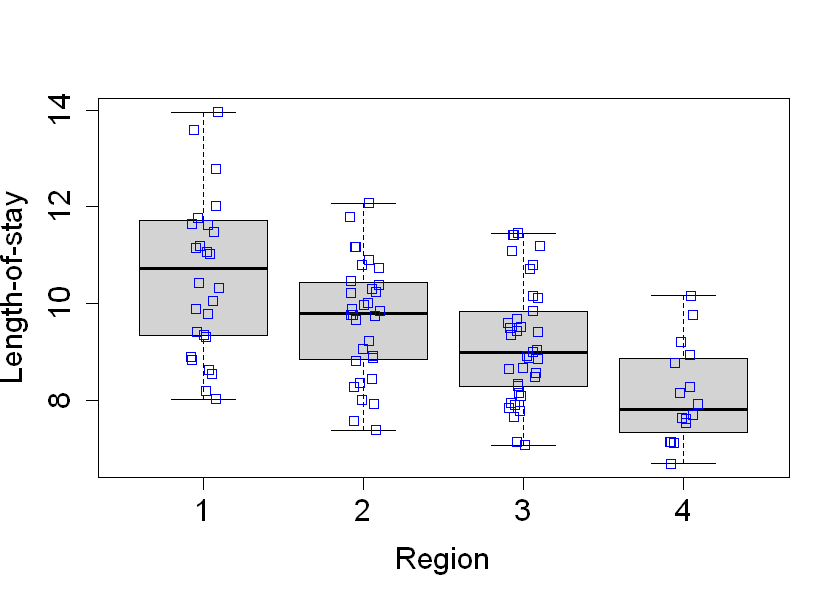

In [46]:
scale = 1.5
boxplot(V2 ~ V9, data= data, outline = FALSE, xlab= "Region", ylab= "Length-of-stay",cex.lab=scale, cex.axis = scale)
stripchart(V2 ~ V9, data=data, method="jitter",
           col="blue", vertical=TRUE, add=TRUE)

fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

fig(7,5)
fig.align = 'center'

Even though the boxes overlap significantly, **the plot seems to indicate that the 4 geographical regions have different mean lengths-of-stay.**

### A.1) ANOVA model:

We run a full ANOVA model on the dataset:

In [4]:
a.full = lm(V2 ~ V9, data = data)
summary(a.full)


Call:
lm(formula = V2 ~ V9, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0589 -1.0314 -0.0234  0.6811  8.4711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.0889     0.3165  35.040  < 2e-16 ***
V92          -1.4055     0.4333  -3.243  0.00157 ** 
V93          -1.8976     0.4194  -4.524 1.55e-05 ***
V94          -2.9752     0.5248  -5.669 1.19e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.675 on 109 degrees of freedom
Multiple R-squared:  0.2531,	Adjusted R-squared:  0.2325 
F-statistic: 12.31 on 3 and 109 DF,  p-value: 5.376e-07


**Since all predictors have p-values less than 0.05, they are all statistically significant by using a significance of 95%.**


### A.2) Diagnostics and remedial measures

We start the diagnosis with a visual inspection for normality of the residuals by using a (1) a QQ plot and (2) a residuals vs fitted values plot:

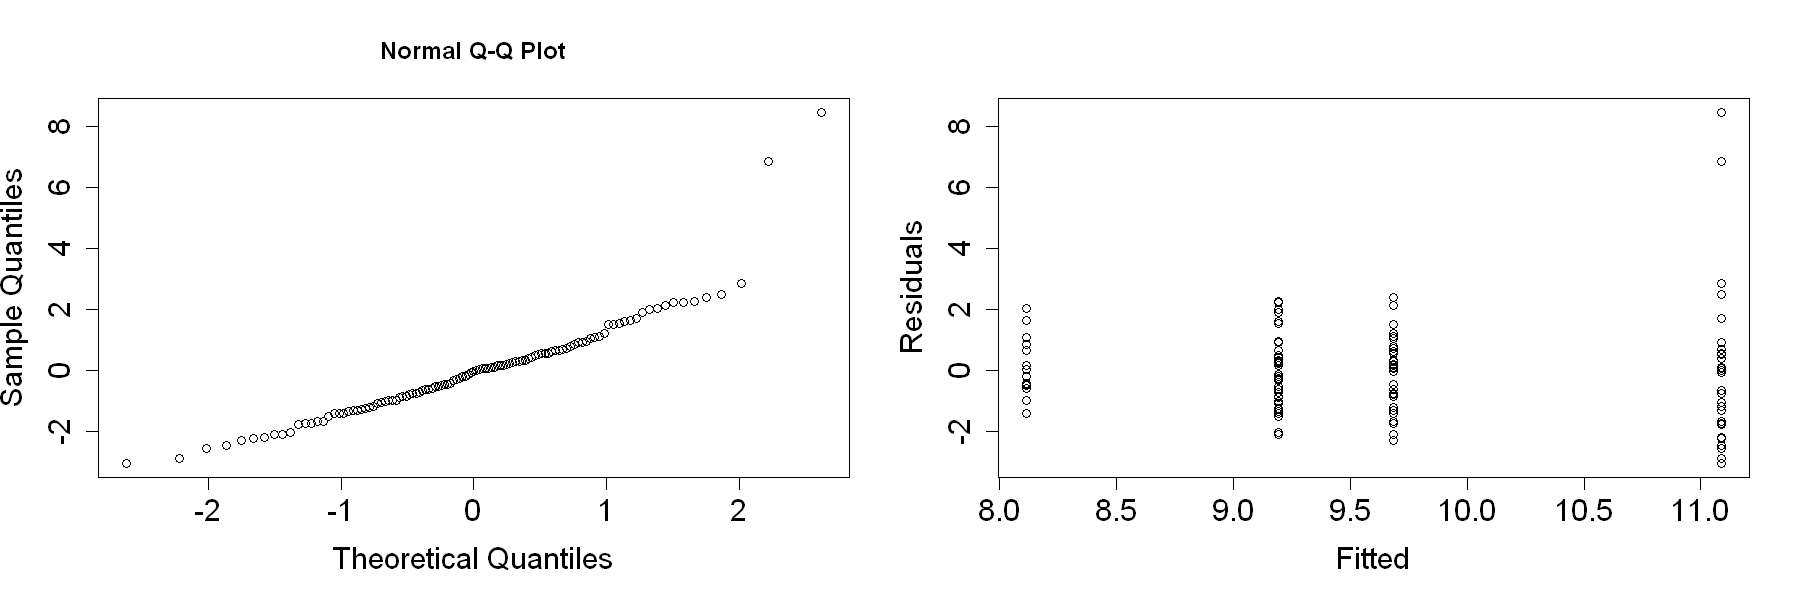

In [48]:
scale = 1.5
par(mfrow=c(1,2))
qqnorm(a.full$res,cex.lab=scale, cex.axis = scale)
plot(a.full$fitted, a.full$res, xlab="Fitted", ylab="Residuals",cex.lab=scale, cex.axis = scale)
fig(15,5)

This figure indicate: 

(i) From the QQ plot, that **there exists two potential outliers**

(ii) From the residuals plot, that **the residuals do not have equal variance.**

Because of conclusion (i), we will check for unusual observations using three methods: 

1 - A test for high leverage

2 - A test for outliers using studentized residuals

3 - A test for high influence


-   First, we look for high leverage points:

In [6]:
a.leverages = lm.influence(a.full)$hat
head(a.leverages)

1          2          3          4          5          6 
0.06250000 0.03125000 0.02702703 0.06250000 0.03571429 0.03125000

In [7]:
n = dim(data)[1]
p  = length(variable.names(a.full))
length(a.leverages[a.leverages>2*p/n])

[1] 0

Thus, no high-leverage points found.

-   Second, look for outliers:

In [8]:
a.resid = rstudent(a.full)
bonferroni = abs(qt(.05/(2*n), n-p-1))
a.resid[a.resid > bonferroni]


47      112 
5.895443 4.522904

Thus, observations 47 and 112 are potential outliers. Indeed, they have significantly larger lengths-of-stay if compared to their region average:

In [9]:
a.full$coefficients[data[47,]$V9]
data[47,]$V2

a.full$coefficients[data[112,]$V9]
data[112,]$V2

(Intercept) 
   11.08893

[1] 19.56

(Intercept) 
   11.08893

[1] 17.94

-   Finally, let's consider high influential points

In [10]:
a.cooks = cooks.distance(a.full)
sort(a.cooks, decreasing = TRUE)[1:4]

47        112         70         28 
0.24571999 0.16072402 0.03204074 0.02877656

Since no data point has a Cook's distance more than 1, there are no highly-influential points.

As a remedial measure, let's delete the two outliers and re-fit the model:

In [11]:
data_new = data[-c(47,112),]
a.full.new = lm(V2 ~V9, data = data_new)
summary(a.full.new)


Call:
lm(formula = V2 ~ V9, data = data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4696 -0.9738 -0.0234  0.8114  3.4504 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.4996     0.2529  41.517  < 2e-16 ***
V92          -0.8162     0.3405  -2.397 0.018256 *  
V93          -1.3083     0.3300  -3.964 0.000133 ***
V94          -2.3859     0.4097  -5.823 6.14e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.29 on 107 degrees of freedom
Multiple R-squared:  0.2562,	Adjusted R-squared:  0.2354 
F-statistic: 12.29 on 3 and 107 DF,  p-value: 5.711e-07


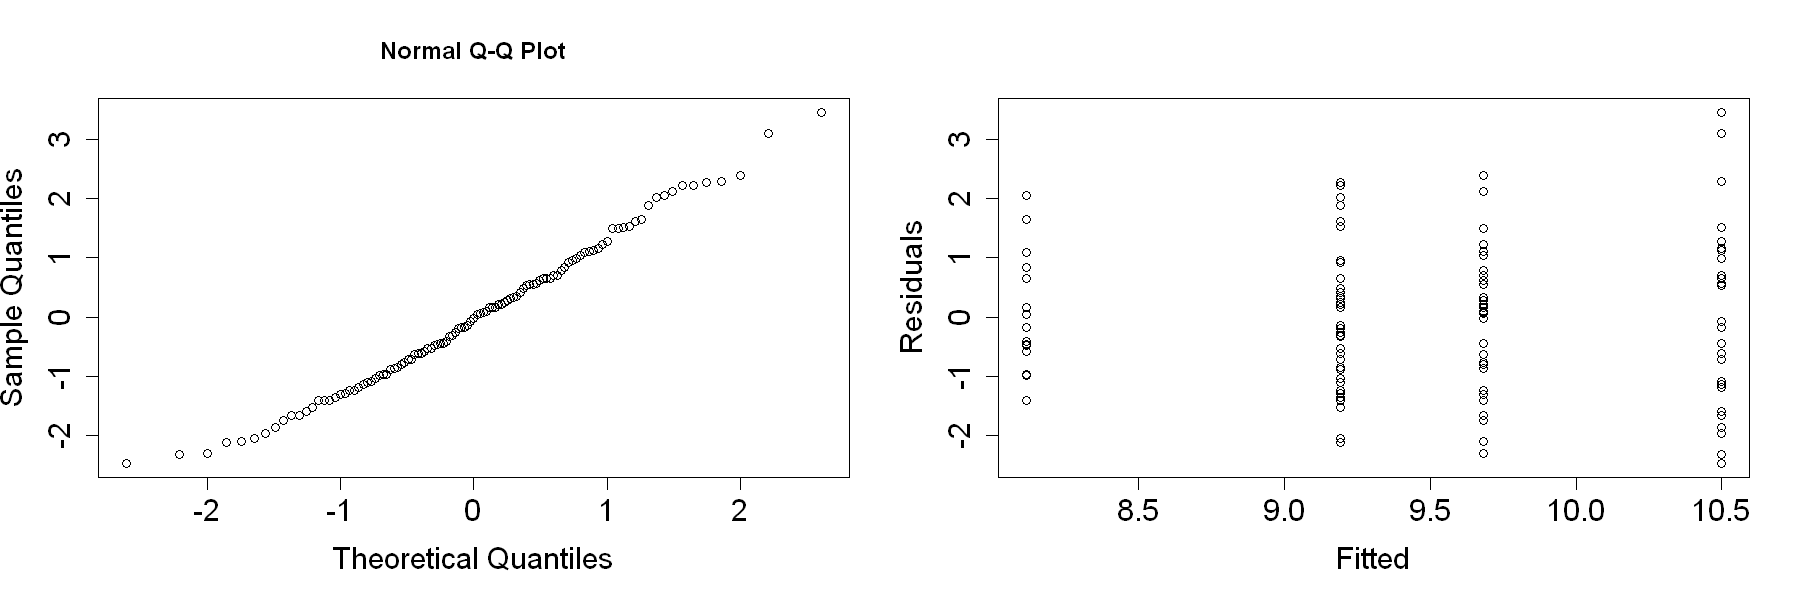

In [12]:
par(mfrow=c(1,2))
qqnorm(a.full.new$res,cex.lab=scale, cex.axis = scale)
plot(a.full.new$fitted, a.full.new$res, xlab="Fitted", ylab="Residuals",cex.lab=scale, cex.axis = scale)
fig(15,5)

The residuals are now well centered at 0 and no outliers seem to be present. On the other hand, the residual's variance is still far from constant.

Let's do a Box-Cox transformation to remedy that:

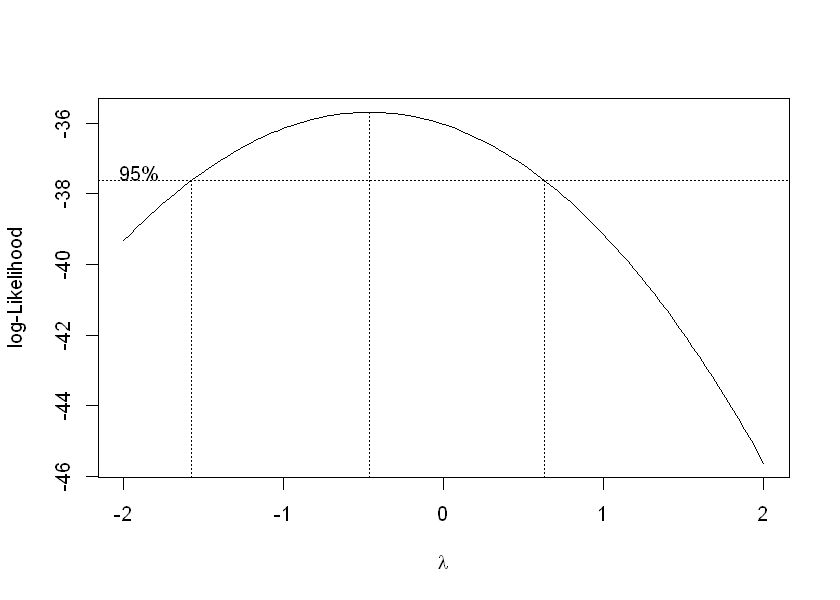

In [50]:
boxcox(a.full.new)
fig(7,5)

Let's do the transformation with $\lambda$ = -1:

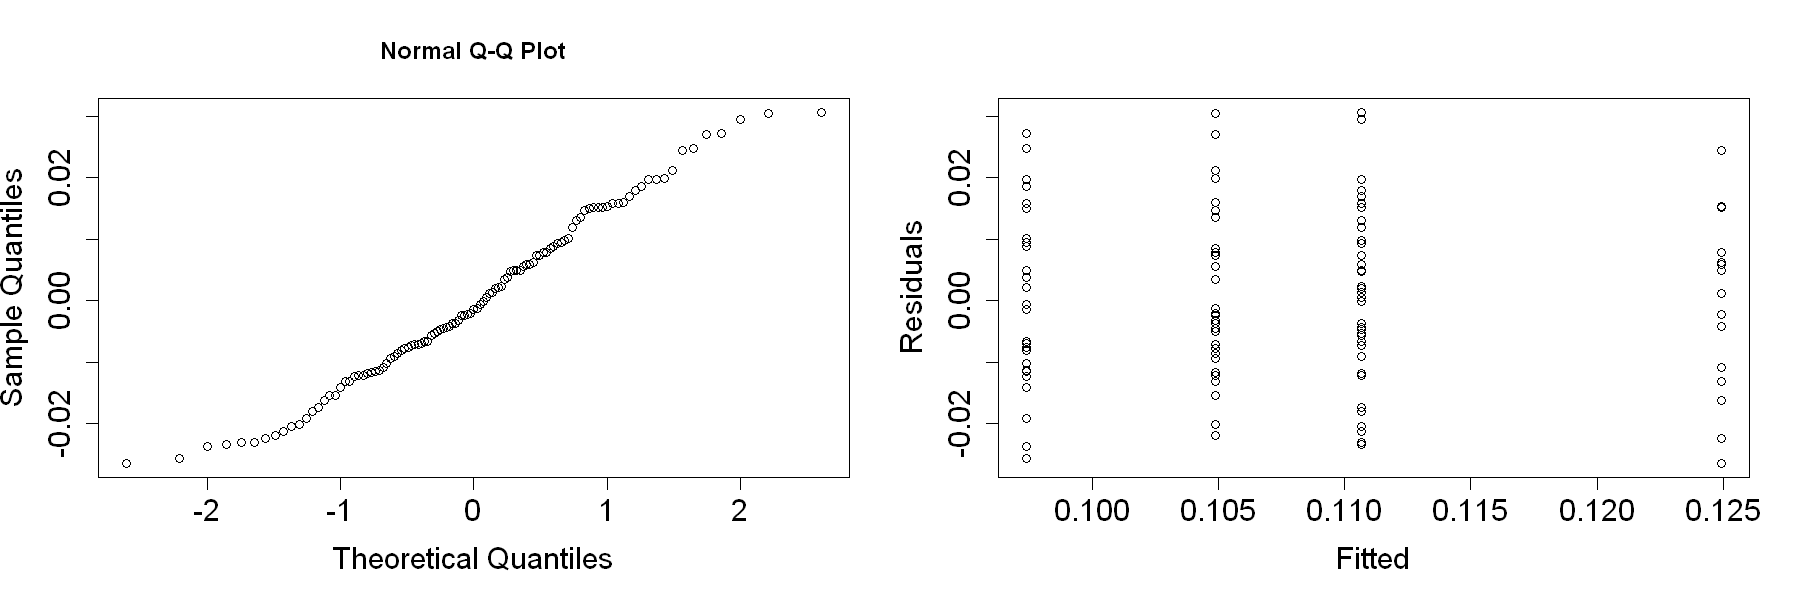

In [52]:
a.boxcox = lm(1/V2 ~ V9, data = data_new)
par(mfrow=c(1,2))
qqnorm(a.boxcox$res,cex.lab=scale, cex.axis = scale)
plot(a.boxcox$fitted, a.boxcox$res, xlab="Fitted", ylab="Residuals",cex.lab=scale, cex.axis = scale)
fig(15,5)

Residuals and QQ plot look very close to ideal now. Finally, check the p-value and coefficients of the transformed model:

In [15]:
summary(a.boxcox)


Call:
lm(formula = 1/V2 ~ V9, data = data_new)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026511 -0.010591 -0.001409  0.009639  0.030581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.097379   0.002801  34.762  < 2e-16 ***
V92         0.007480   0.003771   1.983  0.04988 *  
V93         0.013284   0.003655   3.634  0.00043 ***
V94         0.027558   0.004539   6.072 1.96e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01428 on 107 degrees of freedom
Multiple R-squared:  0.2706,	Adjusted R-squared:  0.2502 
F-statistic: 13.23 on 3 and 107 DF,  p-value: 2.061e-07


Thus, the overall p-value is less than 0.05.

Finally, lets perform a Tukey test to check the significance of the differences between each region:

In [16]:
tukey.a = TukeyHSD(aov(1/V2 ~ V9, data=data_new))
tukey.a

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = 1/V2 ~ V9, data = data_new)

$V9
           diff          lwr        upr     p adj
2-1 0.007480272 -0.002362514 0.01732306 0.2006919
3-1 0.013283815  0.003743813 0.02282382 0.0023985
4-1 0.027557890  0.015712655 0.03940313 0.0000001
3-2 0.005803543 -0.003195875 0.01480296 0.3376593
4-2 0.020077619  0.008663264 0.03149197 0.0000707
4-3 0.014274076  0.003119763 0.02542839 0.0062590


Thus, when comparing regions 1 vs 2 and 2 vs 3 we cannot say that they have statistically different means.

However, using a 95% significance level, we can say that:

-   **Regions 1 and 3 have different means.**

-   **Region 4 has different mean than the others.**

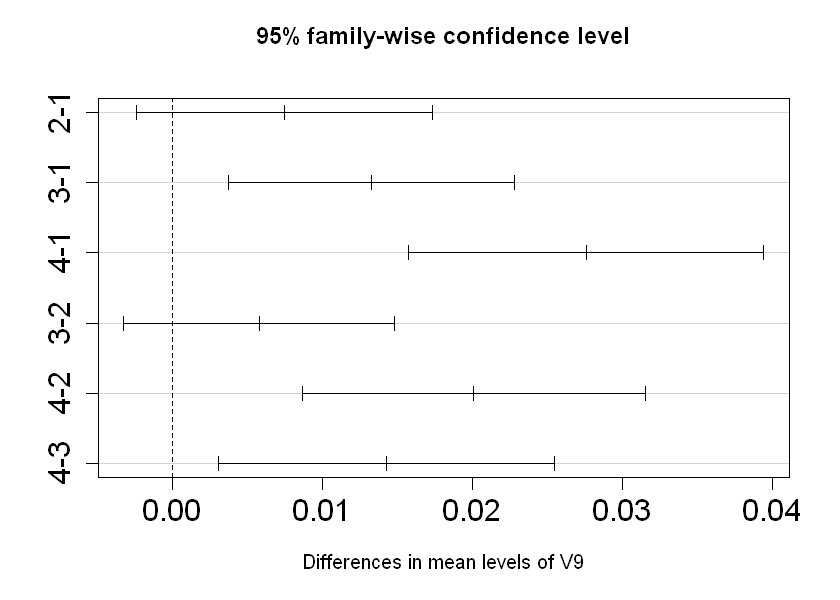

In [54]:
plot(tukey.a,cex.lab=scale, cex.axis = scale)
fig(7,5)

Let's check if these conclusions hold using Bonferroni corrections:

In [18]:
pairwise.t.test(data_new$V2, data_new$V9, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  data_new$V2 and data_new$V9 

  1       2       3      
2 0.10953 -       -      
3 0.00080 0.70134 -      
4 3.7e-07 0.00077 0.03714

P value adjustment method: bonferroni 

**Thus both Tukey and Bonferroni tests agree.**

## Part B 

### B.0) Data transformation and visualization:

In Part B, we test whether the age of the patients is statistically significant factor in the length-of-stay for a
provided sub-set of the data. To see the effect of Age, we partitioned the patients into two groups: (i) Patients aged
54 years or more and (ii) patients aged 53.9 years or less. 

In [19]:
index_b = c(1:44,  46, 48, 51, 53 ,57, 58, 60, 63, 66 ,74 ,76, 79 ,80 ,83 ,84, 88, 94, 101 ,103, 111)
data_b = data[index_b,]
data_b$V13 = factor(data_b$V3 <=54, labels = c("Older", "Younger"))


The next figure shows the mean length-of-stay for each of these groups and for each Region of the study

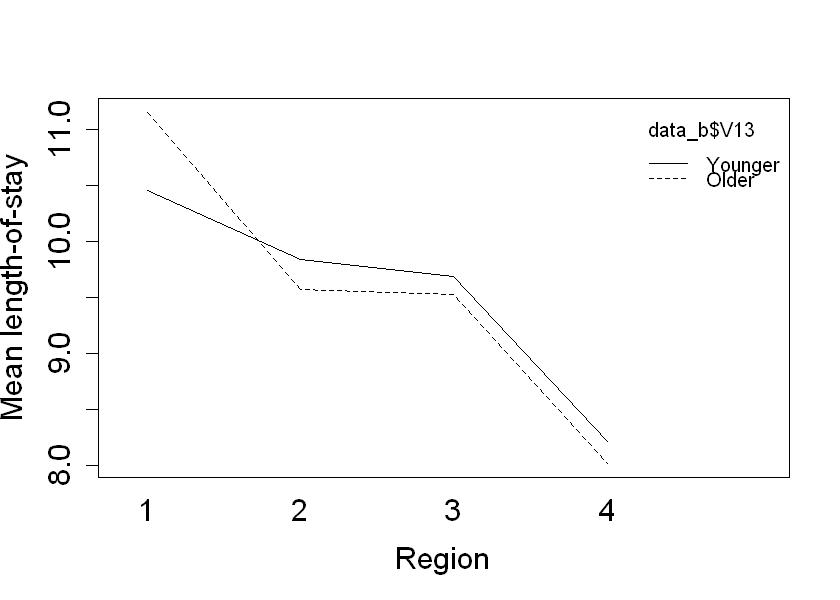

In [20]:
interaction.plot(data_b$V9, data_b$V13, data_b$V2, 
                 xlab = "Region", ylab = "Mean length-of-stay",
                 cex.lab=scale, cex.axis = scale)
fig(7,5)

Since the lines are intersecting, it is possible that Age Factor and Region have interaction terms.

### B.1) ANOVA models:

Try the full model first:

In [21]:
b.full = lm(V2 ~ V9*V13, data = data_b)
print(anova(b.full))

Analysis of Variance Table

Response: V2
          Df Sum Sq Mean Sq F value    Pr(>F)    
V9         3 56.744 18.9147 12.9323 1.575e-06 ***
V13        1  0.004  0.0041  0.0028    0.9578    
V9:V13     3  2.462  0.8207  0.5611    0.6429    
Residuals 56 81.905  1.4626                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


We observe that the interactions terms and Age Factor variable are not statistically significant.

In fact, let's check the p-value of the model with only Age Factor included:

In [22]:
print(anova(lm(V2 ~ V13, data = data_b)))

Analysis of Variance Table

Response: V2
          Df  Sum Sq Mean Sq F value Pr(>F)
V13        1   0.057 0.05706  0.0251 0.8747
Residuals 62 141.058 2.27513               


**Since the p-value of this model is much bigger than 0.05, we discard the influence of Age Factor in the mean length-of-stay for the patients of Problem B.**

### B.2) Diagnostics and remedial measures:

On the analysis of the patients in Part B, we perform a similar analysis done in Part A, with **only the Regions factor included on the model**:

In [23]:
b.res = lm(V2 ~V9, data = data_b)

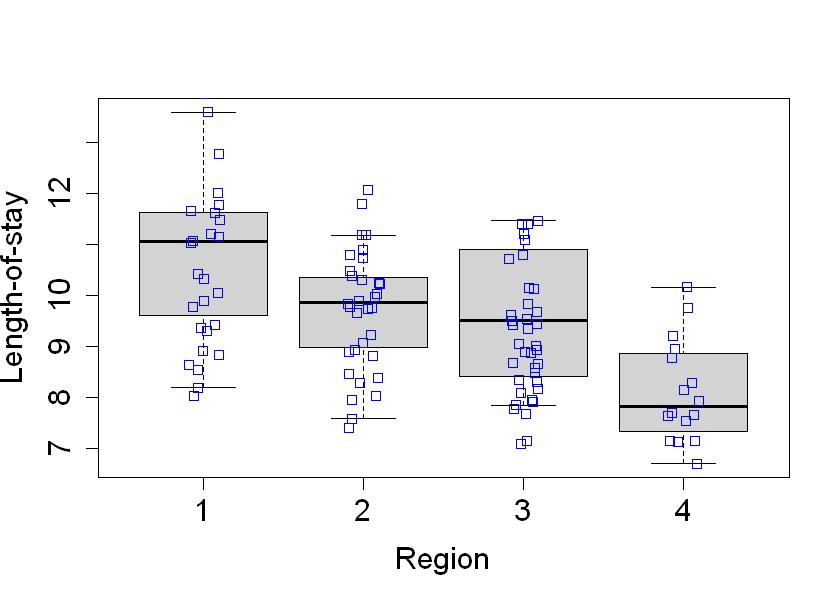

In [56]:
boxplot(V2 ~ V9, data= data_b, outline = FALSE, xlab= "Region", ylab= "Length-of-stay", cex.lab=scale, cex.axis = scale)
stripchart(V2 ~ V9, data=data, method="jitter",
           col="blue", vertical=TRUE, add=TRUE)

fig(7,5)

QQ and residuals plot:

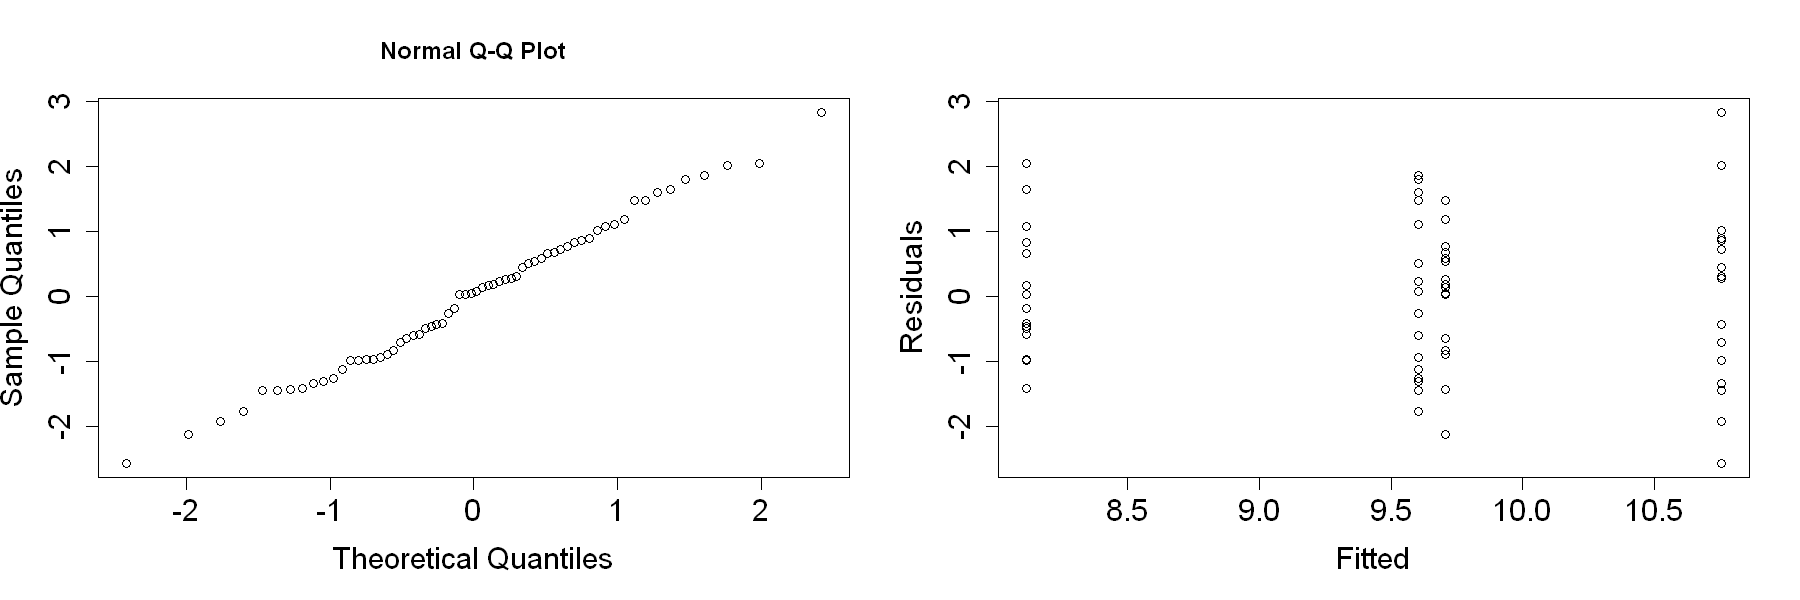

In [58]:
par(mfrow=c(1,2))
qqnorm(b.res$res, cex.lab=scale, cex.axis = scale)
plot(b.res$fitted, b.res$res, xlab="Fitted", ylab="Residuals", cex.lab=scale, cex.axis = scale)

fig(15,5)

**No outlier is apparent in this dataset. However, the variance does not seem to be constant across the 4 regions.** Thus, we will perform a Box-Cox transformation to enhance the quality of the fit regression

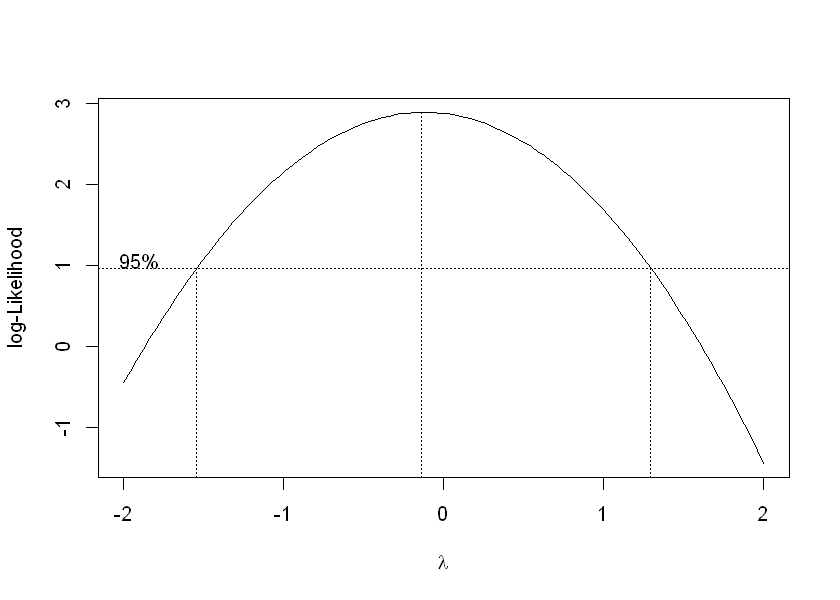

In [60]:
boxcox(b.res)
fig(7,5)

Again we do the transformation with $\lambda$ = -1:

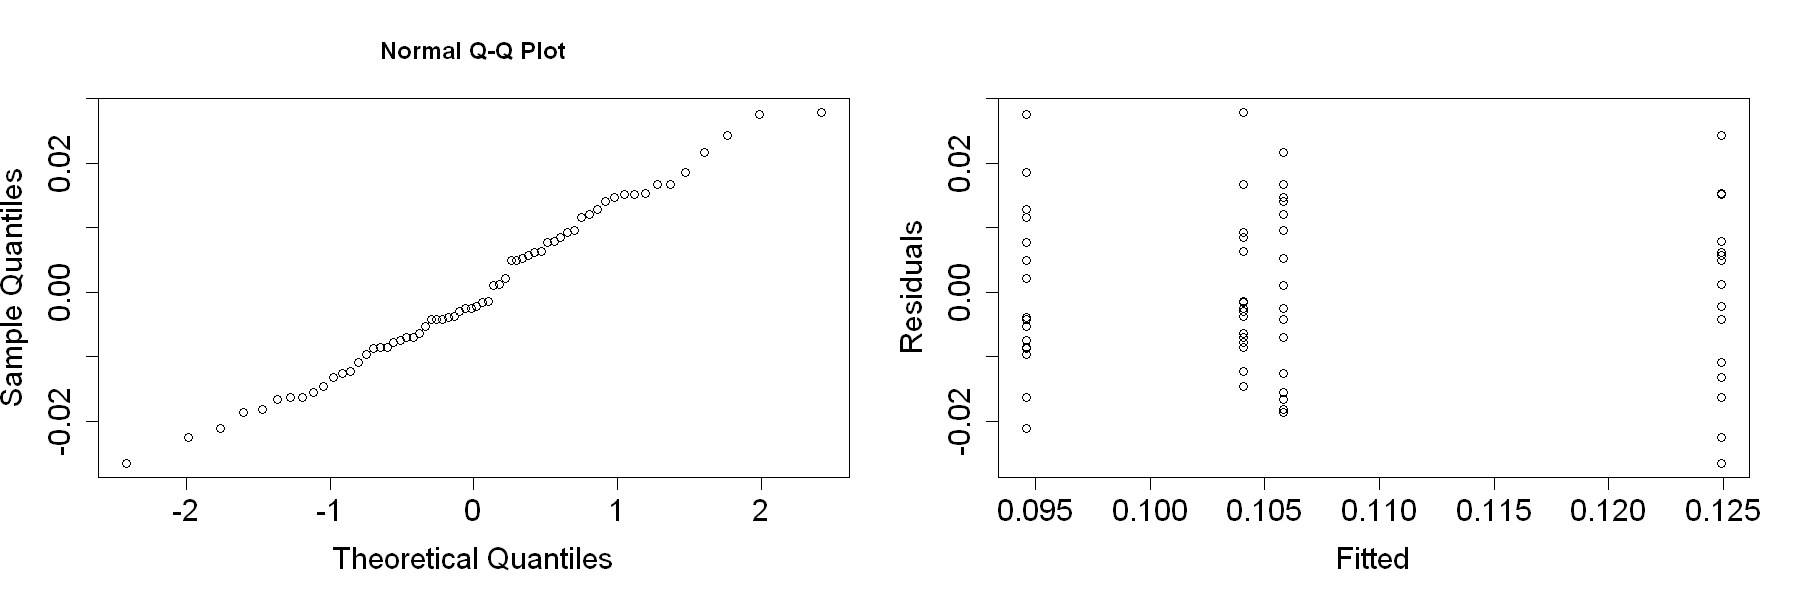

In [62]:
b.boxcox = lm(1/(V2) ~ V9, data = data_b)
par(mfrow=c(1,2))
qqnorm(b.boxcox$res, cex.lab=scale, cex.axis = scale)
plot(b.boxcox$fitted, b.boxcox$res, xlab="Fitted", ylab="Residuals", cex.lab=scale, cex.axis = scale)

fig(15,5)


We check the summary of the transformed model

In [28]:
summary(b.boxcox)


Call:
lm(formula = 1/(V2) ~ V9, data = data_b)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026511 -0.008598 -0.002334  0.009368  0.027868 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.094589   0.003309  28.582  < 2e-16 ***
V92         0.009469   0.004680   2.023   0.0475 *  
V93         0.011241   0.004680   2.402   0.0194 *  
V94         0.030347   0.004680   6.484 1.88e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01324 on 60 degrees of freedom
Multiple R-squared:  0.4248,	Adjusted R-squared:  0.396 
F-statistic: 14.77 on 3 and 60 DF,  p-value: 2.598e-07


Tukey test for differences:

In [29]:
tukey.b = TukeyHSD(aov(1/V2 ~ V9, data=data_b))
tukey.b

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = 1/V2 ~ V9, data = data_b)

$V9
           diff          lwr        upr     p adj
2-1 0.009468551 -0.002899034 0.02183614 0.1910460
3-1 0.011241146 -0.001126439 0.02360873 0.0876232
4-1 0.030347351  0.017979766 0.04271494 0.0000001
3-2 0.001772595 -0.010594990 0.01414018 0.9813212
4-2 0.020878800  0.008511215 0.03324638 0.0002093
4-3 0.019106205  0.006738620 0.03147379 0.0007551


**Thus, when comparing any of the regions 1, 2 and 3 together, we cannot say that they have statistically different means.**

**However, with a significance level of 95%, we can say that Region 4 has different mean than the others.**

The next figure illustrates that, showing that all confidence intervals for the differences between Regions 1, 2 and 3 instersect the line x=0. On the other hand, the confidence intervals for the differences w.r.t. Region 4 never instersect 0.

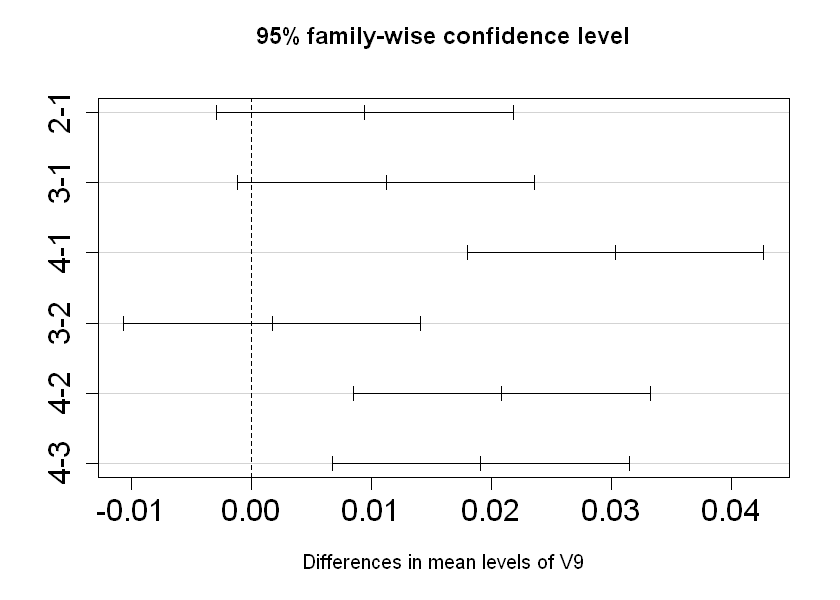

In [64]:
plot(tukey.b, cex.lab=scale, cex.axis = scale)

fig(7,5)

Final check with Bonferroni correction:

In [31]:
pairwise.t.test(data_b$V2, data_b$V9, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  data_b$V2 and data_b$V9 

  1       2      3     
2 0.0897  -      -     
3 0.0469  1.0000 -     
4 2.3e-07 0.0021 0.0045

P value adjustment method: bonferroni 

Here, the **Bonferroni test indicates that Regions 1 and 3 have statistically different means. However, since the p-value is very close to 0.05 (0.0469), we will adopt the results of the Tukey method and conclude thay they do not have statistically different means.**

## Part C 

### C.0) Data transformation and visualization:

In this final part, we evaluated the impact of Region, Age and Availability factors on the mean lengths-of-stay.
This time, the patients are grouped by older or younger than 53 years (Age Factor). Also, the hospitals are grouped
if their potential facilities and services are larger or smaller than 40.2% of the total 35 types specified by the SENIC
project (Availability Factor).

Let's first select the patient numbers and define a two columns which encodes the Age Factor variable (defined by the condition "age larger or equal than 53") and the Availability Factor (defined by the condition "available facilities larger or equal to 40.2%").

In [32]:
index_c = c(1:14, 16:28, 31,32 ,34, 35, 37:39, 41, 44, 46 ,50 ,52, 53 ,57 ,58, 63, 66, 76, 77, 83, 111)
data_c = data[index_c,]
data_c$V13 = factor(data_c$V3 <=53, labels = c("Older", "Younger"))
data_c$V14 = factor(data_c$V12 <=40.2, labels = c("More", "Less"))

Interaction plot between Region and Age Factor:

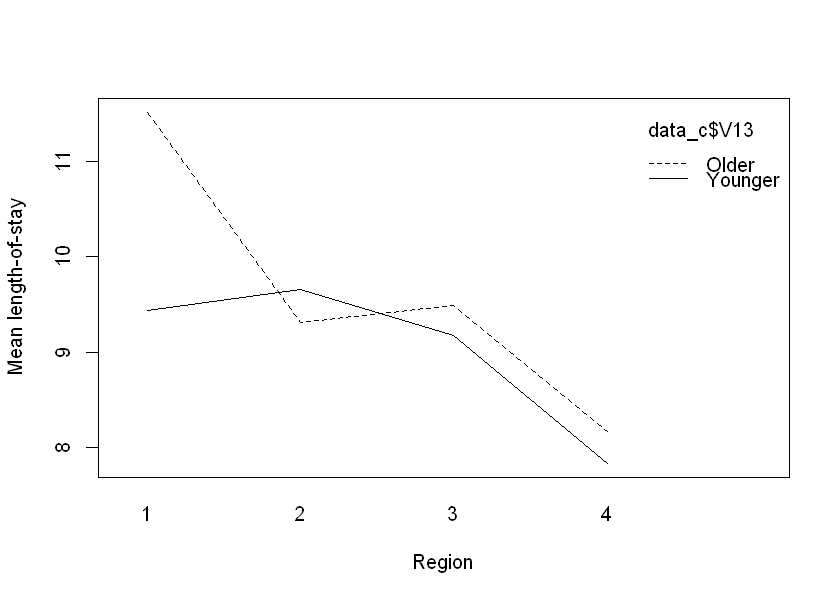

In [33]:
interaction.plot(data_c$V9, data_c$V13, data_c$V2, xlab = "Region", ylab = "Mean length-of-stay")


Interaction plot between Region and Availability Factor:

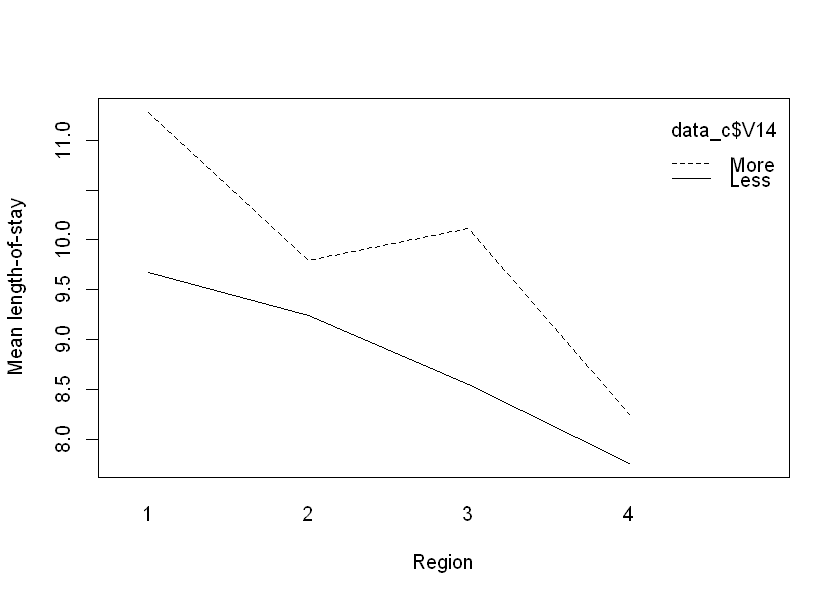

In [34]:
interaction.plot(data_c$V9, data_c$V14, data_c$V2, xlab = "Region", ylab = "Mean length-of-stay")


From the plots, it looks like Age is again not statistically significant, similar to item B. On the other hand, there does seem to be a difference in the mean length-of-stays for patients with different Availability Factors.

### C.1) ANOVA models:

Try the full model first:

In [35]:
c.full = lm(V2 ~ V9*V13*V14, data = data_c)
print(anova(c.full))

Analysis of Variance Table

Response: V2
           Df Sum Sq Mean Sq F value    Pr(>F)    
V9          3 37.435 12.4783 11.6773 2.493e-05 ***
V13         1  4.325  4.3251  4.0474  0.052722 .  
V14         1 13.927 13.9268 13.0328  0.001033 ** 
V9:V13      3  8.668  2.8894  2.7039  0.061837 .  
V9:V14      3  3.490  1.1633  1.0886  0.367997    
V13:V14     1  0.339  0.3393  0.3175  0.577027    
V9:V13:V14  3  1.439  0.4796  0.4488  0.719848    
Residuals  32 34.195  1.0686                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**Similar to Item b, the Age factor is not statistically significant. Thus, we exclude it from the ANOVA.** The reduced model is shown below:

In [36]:
c.res = lm(V2 ~ V9*V14, data = data_c)
print(anova(c.res))

Analysis of Variance Table

Response: V2
          Df Sum Sq Mean Sq F value    Pr(>F)    
V9         3 37.435 12.4783 10.0354 4.642e-05 ***
V14        1 13.262 13.2615 10.6653  0.002243 ** 
V9:V14     3  3.384  1.1281  0.9072  0.446128    
Residuals 40 49.737  1.2434                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**From the p-values of the ANOVA models, we see that both the Region and Availability Factors are statistically significant, but NOT their interaction.**

Thus, we consider the additive model:

In [37]:
c.add = lm(V2 ~ V9 + V14, data = data_c)
summary(c.add)


Call:
lm(formula = V2 ~ V9 + V14, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7619 -0.8381 -0.1527  0.8225  2.5869 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.0031     0.3587  30.673  < 2e-16 ***
V92          -0.9633     0.4538  -2.123  0.03955 *  
V93          -1.1450     0.4538  -2.523  0.01540 *  
V94          -2.4775     0.4538  -5.460 2.22e-06 ***
V14Less      -1.0513     0.3209  -3.276  0.00208 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.111 on 43 degrees of freedom
Multiple R-squared:  0.4883,	Adjusted R-squared:  0.4407 
F-statistic: 10.26 on 4 and 43 DF,  p-value: 6.37e-06


**Since all p-values are less than 0.05, we can proceed the analysis.**

### C.1) Diagnostics and remedial measures:

Again we perform the usual diagnostics using QQ and residual plots

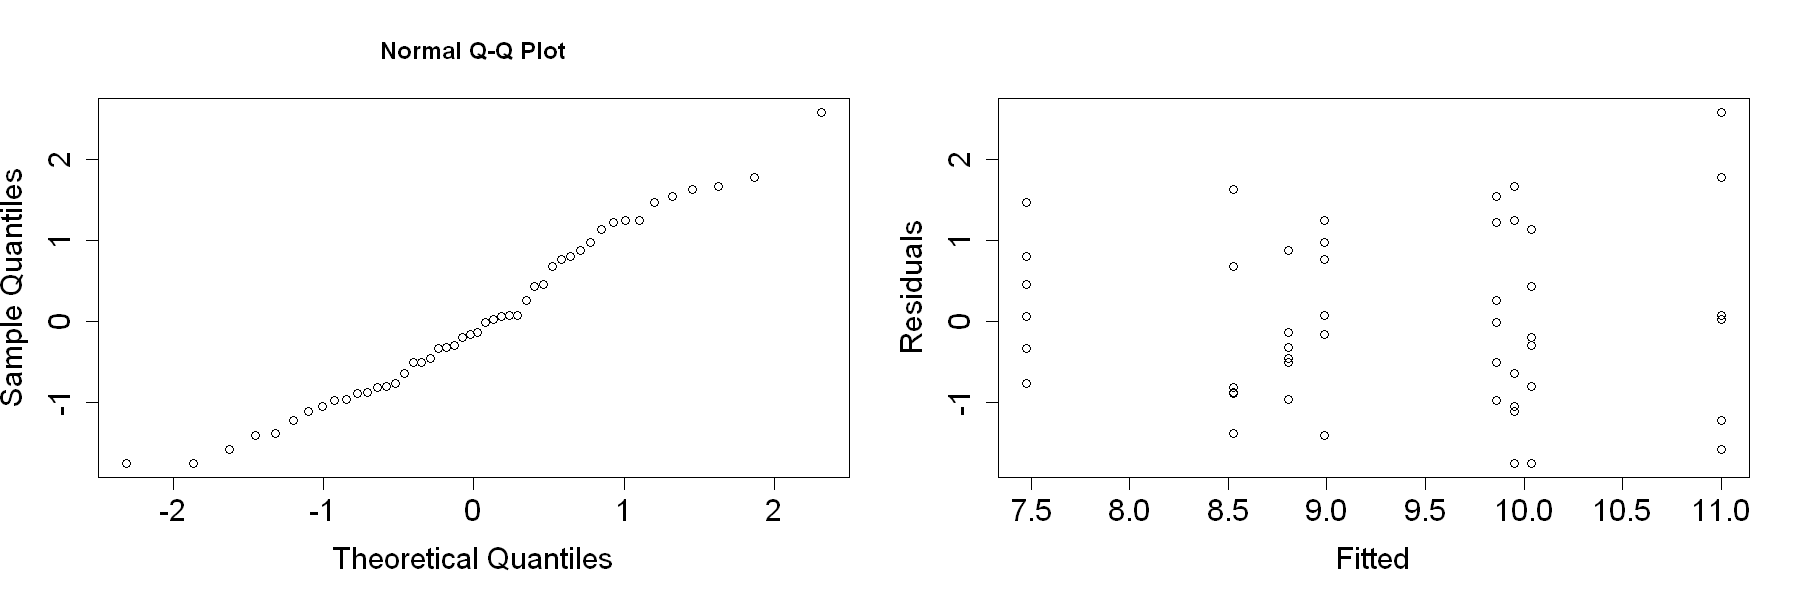

In [66]:
par(mfrow=c(1,2))
qqnorm(c.add$res, cex.lab=scale, cex.axis = scale)
plot(c.add$fitted, c.add$res, xlab="Fitted", ylab="Residuals", cex.lab=scale, cex.axis = scale)

fig(15,5)

No clear outliers are visible in the QQ plot. However, again the residual dispersion is trumpet--shaped. So, we check the Box-Cox transformation as in Parts B and C:

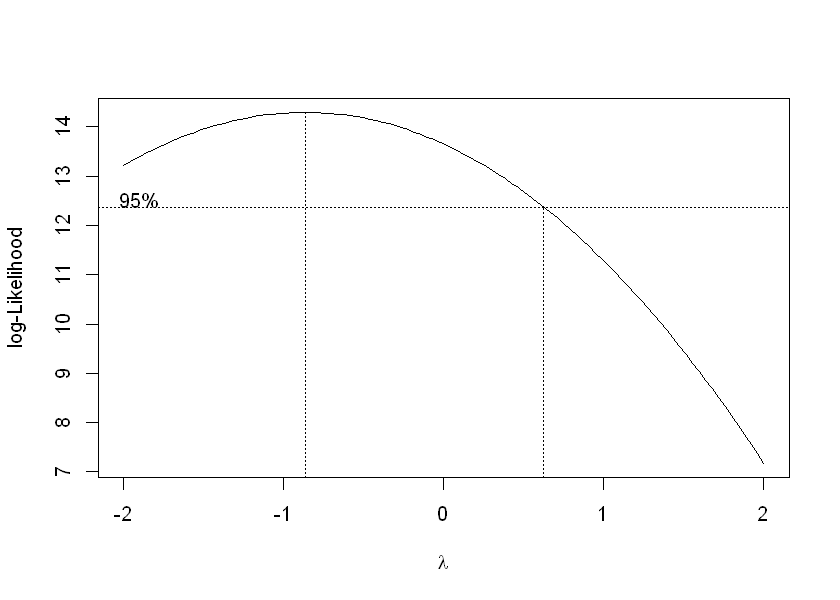

In [71]:
boxcox(c.add)

fig(7,5)

We then fit the transformed model with $\lambda=-1$:

In [40]:
c.add2 = lm(1/V2 ~ V9 + V14, data = data_c)
summary(c.add2)


Call:
lm(formula = 1/V2 ~ V9 + V14, data = data_c)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022488 -0.011172  0.001113  0.009187  0.020300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.091899   0.003965  23.178  < 2e-16 ***
V92         0.008574   0.005015   1.710  0.09454 .  
V93         0.010903   0.005015   2.174  0.03526 *  
V94         0.029014   0.005015   5.785  7.5e-07 ***
V14Less     0.011464   0.003546   3.233  0.00236 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01228 on 43 degrees of freedom
Multiple R-squared:  0.5165,	Adjusted R-squared:  0.4716 
F-statistic: 11.49 on 4 and 43 DF,  p-value: 1.98e-06


We check the diagnostic plots of the transformed model

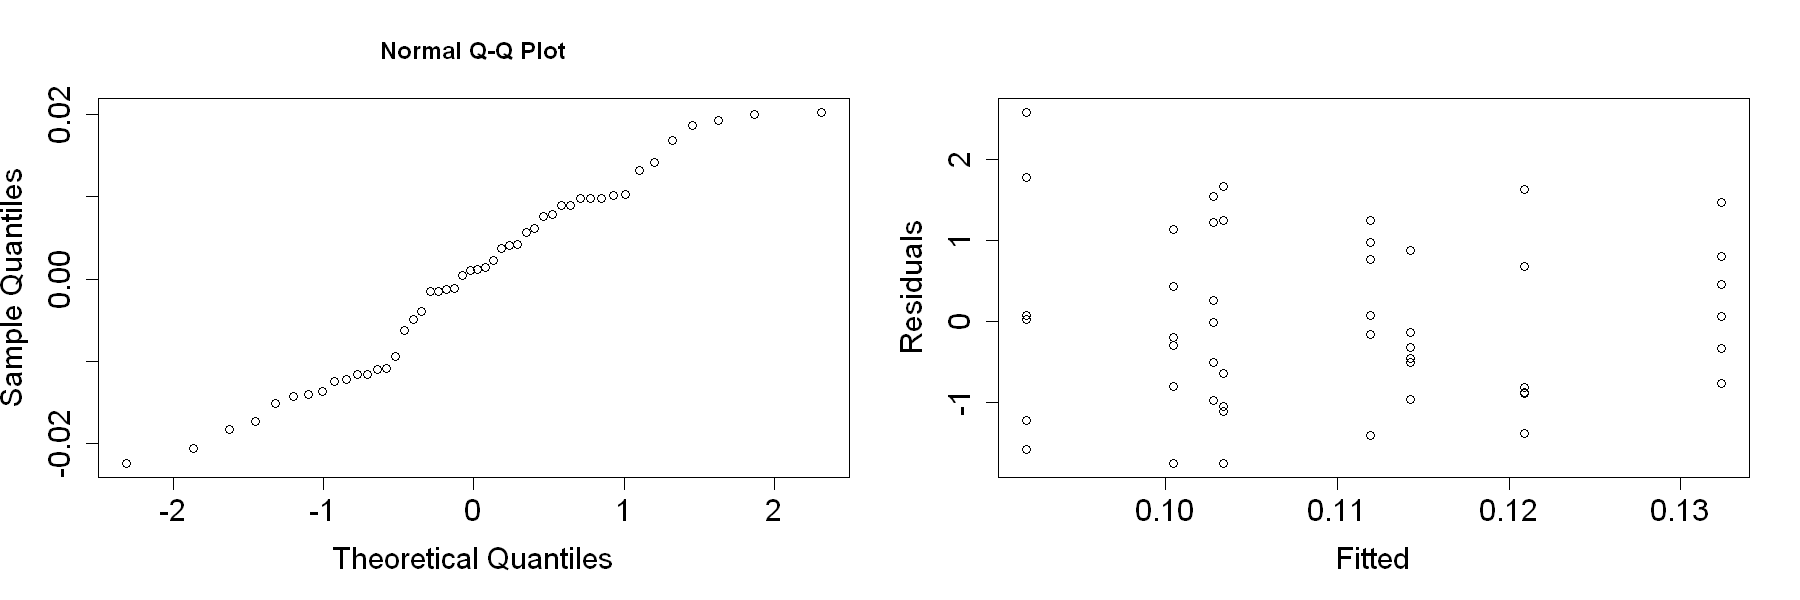

In [73]:
par(mfrow=c(1,2))
qqnorm(c.add2$res, cex.lab=scale, cex.axis = scale)
plot(c.add2$fitted, c.add$res, xlab="Fitted", ylab="Residuals", cex.lab=scale, cex.axis = scale)

fig(15,5)

Finally, the Tukey test for differences:

In [42]:
tukey.c = TukeyHSD(aov(1/V2 ~ V9 + V14, data=data_c))
tukey.c

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = 1/V2 ~ V9 + V14, data = data_c)

$V9
           diff          lwr        upr     p adj
2-1 0.008574374 -0.004828433 0.02197718 0.3312730
3-1 0.010903045 -0.002499762 0.02430585 0.1468560
4-1 0.029014429  0.015611622 0.04241724 0.0000044
3-2 0.002328670 -0.011074136 0.01573148 0.9664195
4-2 0.020440055  0.007037248 0.03384286 0.0010771
4-3 0.018111384  0.004708578 0.03151419 0.0042460

$V14
                diff        lwr        upr     p adj
Less-More 0.01146404 0.00431224 0.01861584 0.0023569


**Thus, when comparing any of the regions 1, 2 and 3 together, we cannot say that they have statistically different means.**

Similarly to the conclusions of Part A and B, we can say with 95% significance level that:

-   **Region 4 has different mean than the others.**

-   **The availability factor has a non-zero effect on the mean length-of-stay.**

For completeness, we show the graphical results of the Tukey test:

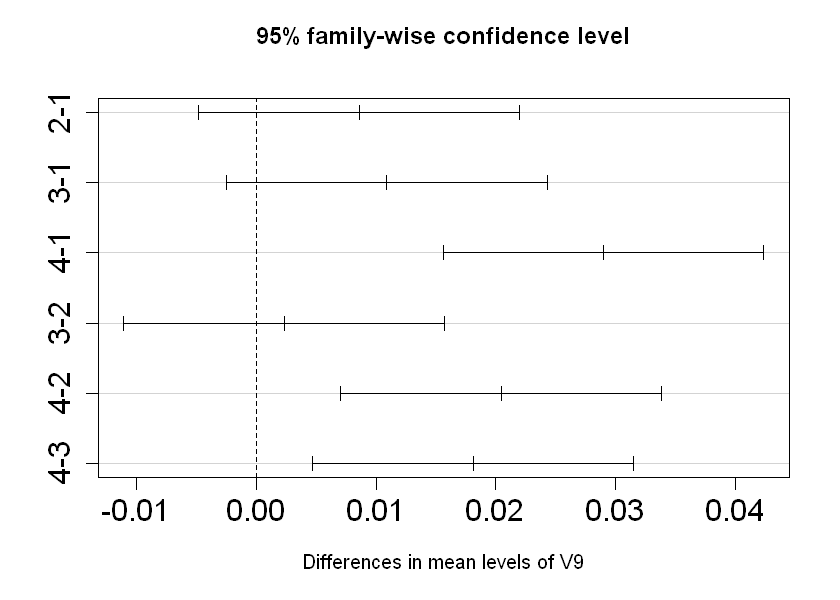

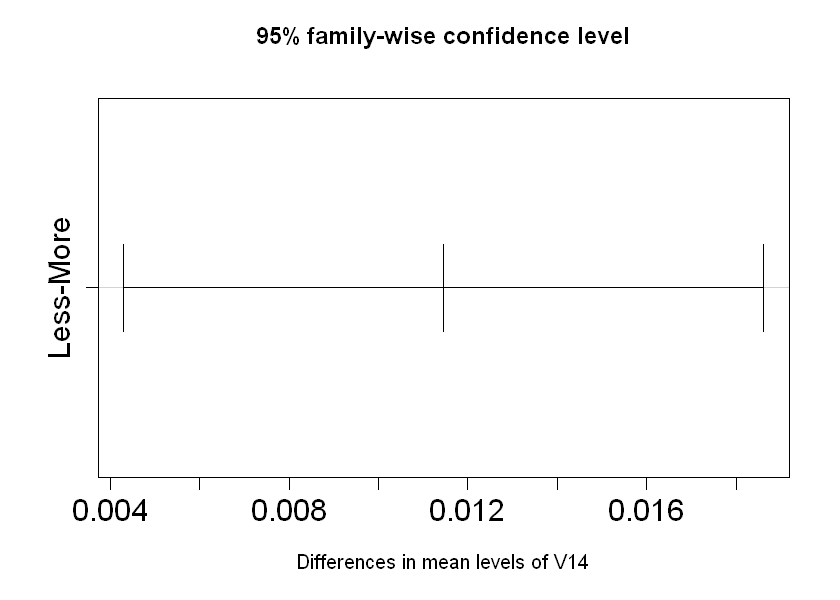

In [75]:
plot(tukey.c, cex.lab=scale, cex.axis = scale)

fig(7,5)

Finally, let's check these conclusions with a Bonferroni test:

In [44]:
pairwise.t.test(data_c$V2, data_c$V9, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  data_c$V2 and data_c$V9 

  1     2     3    
2 0.367 -     -    
3 0.164 1.000 -    
4 7e-05 0.025 0.066

P value adjustment method: bonferroni 

In [45]:
pairwise.t.test(data_c$V2, data_c$V14, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  data_c$V2 and data_c$V14 

     More 
Less 0.013

P value adjustment method: bonferroni 

**Thus both Tukey and Bonferroni tests agree.**

### Conclusions

In this study, we analyzed the length-of-stay for patients treated across 118 hospitals in the years 1975 to 1976.
We compared the length-of-stay for patients hospitalized in different Regions, with different Ages and with different
availabilities of services and facilities. In general terms, it was found that: 

(i) The North Region have different length-of-stay compared to South, Northwest and North-central Regions; 

(ii) Patients younger or older than 53 or 54 years have the same length of stay on average;

(iii) The average length of stay is larger for hospitals with available facilities which are 40.2% or more of the total 35 potential facilities/services of US hospitals.
